In [1]:
import sys
import warnings
warnings.filterwarnings(action='ignore')
import collections
from IPython.display import display
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager, rc
import pandas as pd
import mglearn
from sklearn.model_selection import train_test_split

mpl.rcParams['axes.unicode_minus'] = False
font_fname = '/Users/seongdae/Library/Fonts/NanumGothicLight.ttf'
font_name = font_manager.FontProperties(fname=font_fname).get_name()

rc('font', family=font_name)
# size, family
print ('font size : '+str(plt.rcParams['font.size']) )
print ('font family : '+str(plt.rcParams['font.family']) )
# import default setting
print('python version : {0}\npandas version : {1}\nmatplotlib version : {2}\nnumpy version : {3}\n'
.format(sys.version, pd.__version__, mpl.__version__, np.__version__))

font size : 10.0
font family : ['NanumGothic']
python version : 3.7.6 (v3.7.6:43364a7ae0, Dec 18 2019, 14:18:50) 
[Clang 6.0 (clang-600.0.57)]
pandas version : 0.25.3
matplotlib version : 3.1.2
numpy version : 1.18.1



# 나이즈 베이즈 분류기

In [3]:
# Logistic Regression, LinearSVC 보다 훈련속도가 빠른 편, 일반화 성능이 조금 떨어짐
# 빠른 이유 : 각 특성을 개별로 취급해서 파라미터를 학습, 각 특성에서 클래스별 통계를 단순하게 취합하기 때문
# scikit-learn : GaussianNB, BernoulliNB, MultinormialNB 구현되어 있음
    # GaussianNB는 연속적인 어떤 데이터에도 적용할 수 있음
    # BernoulliNB는 이진 데이터에 적용(이산적 데이터)
    # MultinormialNB는 카운트 데이터(특성이 어떤 것을 헤아린 정수 카운트 ex/ 문장에서 나타난 단어의 횟수)에 적용됨(이산적 데이터)
        # BernoulliNB, MultinormialNB 는 대부분 텍스트 데이터를 분류할 때 사용되곤 함

In [67]:
# BernoulliNB는 각 클래스의 특성중 0이 아닌것이 몇개인지 카운트함
X = np.array([[0, 1, 0, 1], [1, 0, 1, 1], [0, 0, 0, 1], [1, 0, 1, 0]])
print('X.shape : ', X.shape)
y = np.array([0, 1, 0, 1])
print('y.shape : ', y.shape)
counts = {}
for label in np.unique(y):
    # np.unique(y) : array([0, 1]) return, 각 클래스(label)에 대해 반복  
    print('\tlabel : {}\n\ty : {}'.format(label, y))
    print(y==label)
    counts[label] = X[y == label].sum(axis=0)
    # 특성마다 1이 나타난 횟수 셈
print('특성 카운트 : ',counts)
# 4개의 특성을 가진 두개의 클래스(y_0, y_1)가 나온다
from sklearn.naive_bayes import BernoulliNB as bNB
berNB = bNB().fit(X,y)
test = np.array([[1,1,0,0],[1,0,0,0],[1,1,1,1],[1,0,0,1]])
print('berNB score test array : ', berNB.score(test,np.array([1,1,1,0])))
print('berNB predict test array : ', berNB.predict(test))
print('berNB predict test array sum : ', X[y == berNB.predict(test)].sum(axis=0))

X.shape :  (4, 4)
y.shape :  (4,)
	label : 0
	y : [0 1 0 1]
[ True False  True False]
	label : 1
	y : [0 1 0 1]
[False  True False  True]
특성 카운트 :  {0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}
berNB score test array :  0.75
berNB predict test array :  [0 1 1 0]
berNB predict test array sum :  [1 1 1 2]


In [68]:
# 다른 두 나이즈 베이즈 모델 (MultinomialNB, GaussianNB)는 계산하는 통계 데이터의 종류가 조금 다름
# MultinomialNB : 클래스별로 특성의 평균을 계산
# GaussianNB : 클래스별로 각 특성의 표준편차와 평균을 저장

# 예측할 땐, 데이터 포엔트를 클래스의 통계 값과 비교해서
# 가장 잘 맞는 클래스를 예측값으로 함
# MultinomialNB 와 bernolliNB의 예측 공식은 선형 모델과 형태가 유사
    # 하지만 Naive bayes 모델의 coef_는 기울기(w)가 아님
        # coef_ : 특성 카운트 수를 로그 변환한 형태
        # intercept_ : 클래스 카운트 수를 로그 변환한 형태
            # 따라서 예측을 할때, 선형 함수처럼 데이터 포인트(x[n])에 coef_를 곱하고, intercept_를 더하여 클래스에 속할 확률을 계산

## 장단점, 매개변수

In [69]:
# MultinomialNB, BernoulliNB 는 모델의 복잡도를 조정할 수 있는 alpha 매개변수를 가짐
    # alpha가 주어지면, 알고리즘이 모든 특성에 양의 값을 가진 가상의 데이터 포인트를 alpha 개수만큼 추가함
    # 이는 통계 데이터를 완만하게(둔하게) 만들어줌
    # alpha가 크면 더 완만해지고, 모델의 복잡도는 낮아짐
    # 그러나 alpha 값이 성능 향상에 크게 기여하진 않음, 그러나 이 값을 조정하면 어느정도는 정확도를 높일 수도 있음
# GaussianNB(클래스별로 각 특성의 표준편차와 평균)는 대부분 매우 고차원인 데이터셋에 사용, 다른 두 NB는 텍스트와 같은 희소한 데이터를 카운트하는데 사용
    # MultinomialNB(클래스별로 각 특성의 평균 계산)는 보통 0이 아닌 특성이 비교적 많은 데이터셋(큰 문서와 같은)에서
    # BernoulliNB(단순카운트)보다 성능이 높음

In [ ]:
# Naive bayes와 선형 모델의 장단점은 비슷
# 훈련과 예측 속도가 빠르며, 훈련 과정을 이해하기 비교적 쉬움
# 희소한 고차원 데이터에서 잘 작동, 비교적 매개변수에 둔감함
# 선형모델을 사용 했을때 학습시간이 너무 오래걸리는 큰 데이터셋에 Naive bayes 모델들을 시도해볼만 함

## GaussianNB Tutorial

In [74]:
from sklearn import datasets 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

In [75]:
from sklearn.naive_bayes import GaussianNB

# Loading the Iris dataset from scikit-learn
# Here, the third column represents the petal length, and the fourth column the petal width of the flower samples.
# The classes are already converted to integer labels where 0=Iris-Setosa, 1=Iris-Versicolor, 2=Iris-Virginica.

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))


#Splitting data into 70% training and 30% test data:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))


#Standardizing the features:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

Class labels: [0 1 2]
Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


In [82]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100,
                    label='test set')

Misclassified samples: 1
Accuracy: 0.98
Accuracy: 0.98


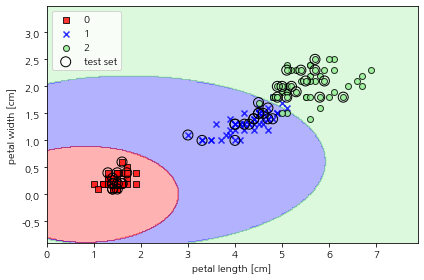

In [84]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Accuracy: %.2f' % gnb.score(X_test, y_test))

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined,
                      classifier=gnb, test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()